In [2]:
import numpy as np
import os
import glob
from collections import OrderedDict
from astropy.io import fits
from astropy.visualization import ZScaleInterval
import matplotlib
%matplotlib notebook
from matplotlib import pyplot as plt
from astropy import table

#For running specutils
import specutils
from specutils.analysis import Splice
from astropy import units as u
from astropy.nddata import StdDevUncertainty

matplotlib.rcParams['image.origin'] = 'lower'

# Read in iraf output

In [3]:
tab_iraf = table.Table.read('/Users/ogaz/specutils/test_data/iraf_splice_uneven.fits')
flux_iraf = tab_iraf['FLUX'].data.data
wave_iraf = tab_iraf['WAVELENGTH'].data.data

# Run Specutils

In [4]:
filenames=glob.glob('/Users/ogaz/specutils/test_data/*x1d.fits')
spectra = []

for filename in filenames:
    tab = table.Table.read(filename)
    spectra.append(specutils.Spectrum1D(flux=tab['FLUX'].data.data.flatten(), 
                spectral_axis=tab['WAVELENGTH'].data.data.flatten(),
                uncertainty=StdDevUncertainty(tab['ERROR'].data.data.flatten())))
    
splicei = Splice(spacing='coarse')
spectra_python=splicei(spectra)

INFO:root:Increasing bin width to 1.3725294876066123 Angstrom.
INFO:root:Increasing bin width to 2.7452110210075267 Angstrom.
INFO:root:Increasing bin width to 2.7452844551690125 Angstrom.
INFO:root:Increasing bin width to 4.879933800468852 Angstrom.
INFO:root:Re-sampling: original and final grids are non-uniform.
INFO:root:Re-sampling: original and final grids are non-uniform.
INFO:root:Re-sampling: original and final grids are non-uniform.
INFO:root:Re-sampling: original and final grids are non-uniform.
INFO:root:Re-sampling: original and final grids are non-uniform.
INFO:root:Re-sampling: original and final grids are non-uniform.
INFO:root:Re-sampling: original and final grids are non-uniform.
INFO:root:Re-sampling: original and final grids are non-uniform.
INFO:root:Re-sampling: original and final grids are non-uniform.


<class 'astropy.units.quantity.Quantity'>
<class 'astropy.units.quantity.Quantity'>
<class 'astropy.units.quantity.Quantity'>
<class 'astropy.units.quantity.Quantity'>
<class 'astropy.units.quantity.Quantity'>
<class 'astropy.units.quantity.Quantity'>
<class 'astropy.units.quantity.Quantity'>
<class 'astropy.units.quantity.Quantity'>
<class 'astropy.units.quantity.Quantity'>


INFO:root:Re-sampling: original and final grids are non-uniform.
INFO:root:Re-sampling: original and final grids are non-uniform.
INFO:root:Re-sampling: original and final grids are non-uniform.
INFO:root:Re-sampling: original and final grids are non-uniform.
INFO:root:Re-sampling: original and final grids are non-uniform.
INFO:root:Re-sampling: original and final grids are non-uniform.
INFO:root:Re-sampling: original and final grids are non-uniform.


<class 'astropy.units.quantity.Quantity'>
<class 'astropy.units.quantity.Quantity'>
<class 'astropy.units.quantity.Quantity'>
<class 'astropy.units.quantity.Quantity'>
<class 'astropy.units.quantity.Quantity'>
<class 'astropy.units.quantity.Quantity'>
<class 'astropy.units.quantity.Quantity'>


INFO:root:Re-sampling: original and final grids are non-uniform.
INFO:root:Re-sampling: original and final grids are non-uniform.
INFO:root:Re-sampling: original and final grids are non-uniform.
INFO:root:Re-sampling: original and final grids are non-uniform.
INFO:root:Re-sampling: original and final grids are non-uniform.


<class 'astropy.units.quantity.Quantity'>
<class 'astropy.units.quantity.Quantity'>
<class 'astropy.units.quantity.Quantity'>
<class 'astropy.units.quantity.Quantity'>
<class 'astropy.units.quantity.Quantity'>


# Comparison Plots

In [18]:
flux_diff = (flux_iraf[0][1:-1] - spectra_python.flux.value) / np.average(flux_iraf[0][:-2])

In [23]:
print("flux iraf: len - {}\n{}\n".format(len(flux_iraf[0][:-2]), flux_iraf[0][:-2]))
print("wave iraf: len - {}\n{}\n".format(len(wave_iraf[0][:-2]), wave_iraf[0][:-2]))
print("flux python: len - {}\n{}\n".format(len(spectra_python.flux), spectra_python.flux))
print("wave python: len - {}\n{}\n".format(len(spectra_python.spectral_axis), spectra_python.spectral_axis))

flux iraf: len - 1762
[1.8143789e-12 1.4792974e-12 1.4136920e-12 ... 1.0448090e-11 9.4895914e-12
 9.1132041e-12]

wave iraf: len - 1762
[ 1667.53415299  1672.35786721  1677.18170288 ... 10247.08482548
 10252.01660331 10256.94838249]

flux python: len - 1762
[1.20633018e-12 1.55437369e-12 1.45701007e-12 ... 9.94577211e-12
 9.25300841e-12 1.06262146e-11] Jy

wave python: len - 1762
[ 1665.80751062  1670.68744442  1675.56737822 ... 10249.61106564
 10254.49099944 10259.37093324] Angstrom



<IPython.core.display.Javascript object>


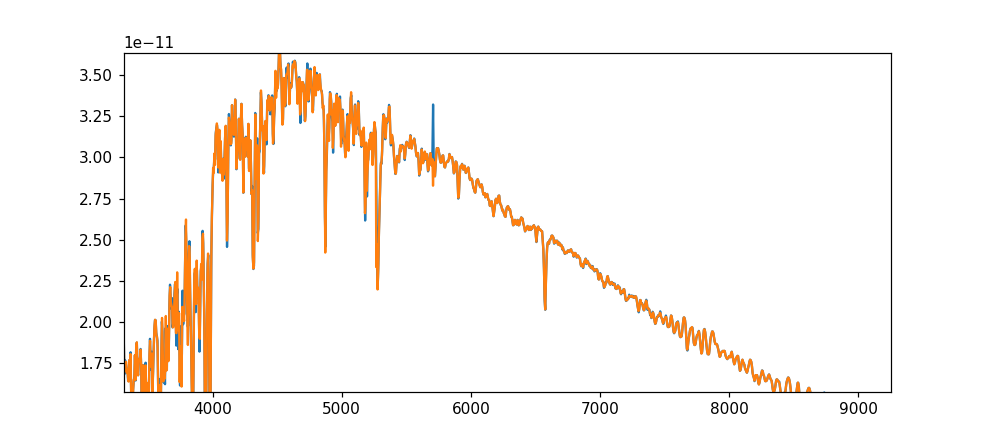

In [14]:
fig, axes = plt.subplots()
fig.set_size_inches(9, 4)
#axes.set_xlim(5000,7000)
axes.plot(wave_iraf[0],flux_iraf[0])
axes.plot(spectra_python.spectral_axis, spectra_python.flux)

Avg:0.00026478248739184756 Min:-0.9064811594007266, Max:0.8407100003320678


<IPython.core.display.Javascript object>


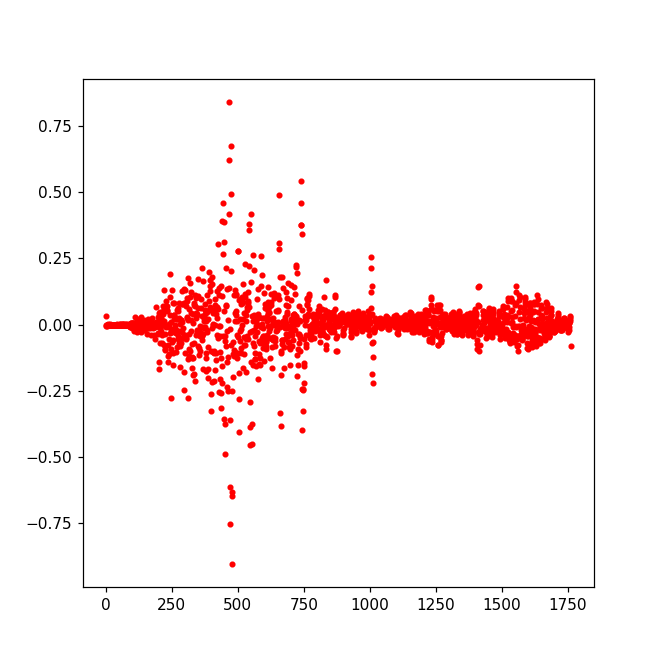

In [20]:
print("Avg:{} Min:{}, Max:{}".format(np.average(flux_diff), min(flux_diff), max(flux_diff)))

fig, axes = plt.subplots()
fig.set_size_inches(6, 6)
axes.plot(flux_diff.flatten(), 'r.')

plt.show()